# Unsupervised Learning
K-Means Clustering


In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [63]:
x = [4,5,10,4,10,8,2,3,7,3,9,5,7,9,2,1,10,3,11,2]
y = [27,29,20,22,23,27,22,30,21,27,25,29,21,25,30,21,20,29,26,28]
data = list(zip(x,y))
print(data)

[(4, 27), (5, 29), (10, 20), (4, 22), (10, 23), (8, 27), (2, 22), (3, 30), (7, 21), (3, 27), (9, 25), (5, 29), (7, 21), (9, 25), (2, 30), (1, 21), (10, 20), (3, 29), (11, 26), (2, 28)]


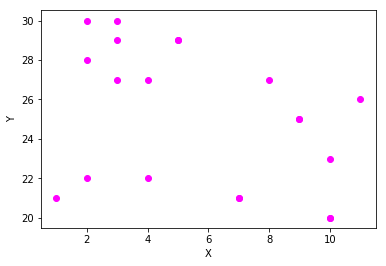

In [64]:
# x = data[x]
# y = data[y]
plt.scatter(x,y,color="magenta")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [65]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 15)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

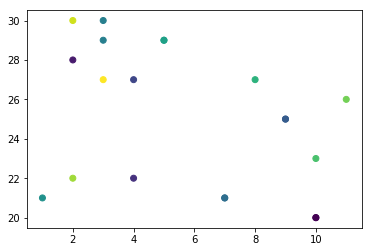

In [66]:
plt.scatter(x,y,c=model.labels_)
plt.show()

In [67]:
model.score(data)

-0.5

In [68]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df["Age"]=df["Age"].fillna(29.6)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [73]:
df1 = df.dropna()

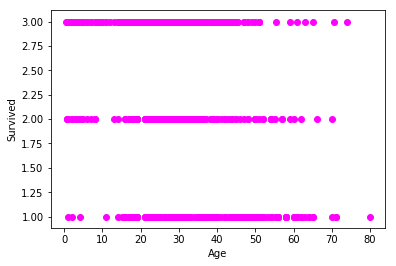

In [74]:
x = df["Age"]
y = df["Pclass"]
plt.scatter(x,y,color="magenta")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)
data1 = list(zip(x_train,y_train))

In [88]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 60)
model.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

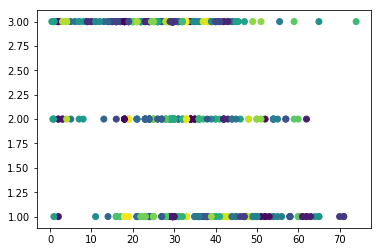

In [89]:
plt.scatter(x_train,y_train,c=model.labels_)
plt.show()

In [91]:
model.score(data1)

-159.56873668586965

In [93]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data1)
    cs.append(kmeans.inertia_)

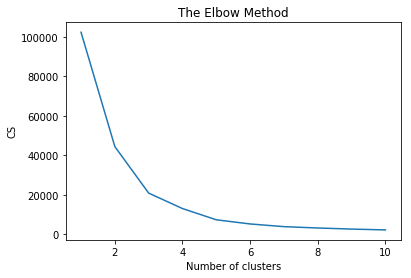

In [94]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()